In [24]:
from azure.quantum import Workspace
workspace = Workspace (
    subscription_id = "d46e6d2d-45b3-47cf-b8dc-167c2c75116d",
    resource_group = "azurequantum",
    name = "quantumem",
    location = "westcentralus"
)

# This provided the connection with Microsoft-Azure, where we can use the native gates with IonQ
# (so far until now).


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi as pi

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin, sqrt

label_size = 20


import time
#from numba import jit

T0=time.time()

In [26]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider


In [27]:
provider = AzureQuantumProvider(
  resource_id="/subscriptions/d46e6d2d-45b3-47cf-b8dc-167c2c75116d/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/QuantumEM",
  location="West Central US"
)

# Calld the provider

In [28]:
#pip install qiskit-ionq==0.3.1

# Install qiskit-ionq version by default.


In [29]:
# import utils
from qiskit import QuantumCircuit
from qiskit_ionq import IonQProvider
# import gates
from qiskit_ionq import GPIGate, GPI2Gate, MSGate

In [30]:
# Set the number of qubits to be used
N_qub=4


In [ ]:
# Circuit for a realization of the Deutsch-Josza algorithm

def Circuit_N(N_qub=N_qub):
    Ar_qub=[]
    circuit = QuantumCircuit(N_qub,N_qub)

    """ This circuit constructs a balanced function with 0 output (basically the identity matrix as black-box)
    for the Deutsch-Jozsa algorithm. 

    - N_qub:= number of qubits to be used
    - GPI2Gate(1/4) anb GPIGate(0  ) are native realizations of noisy gates in IonQ (They are part of a universal 
      quantum computing gates). For futher reference type help(GPIGate),help(GPI2Gate), help(MSGate) or go to
      https://ionq.com/docs/getting-started-with-native-gates. If there is any disagreeement between help an dthe
      web page please follow the result from help.
    
    """
    for j in range(N_qub):

        Ar_qub.append(j)
        
        circuit.append(GPI2Gate(1/4),[j])
        circuit.append( GPIGate(0  ),[j])  # Hadamard gate

        circuit.append( GPIGate(0  ),[j])
        circuit.append( GPIGate(0  ),[j])  # Identity gate, Black-Box

        circuit.append(GPI2Gate(1/4),[j])
        circuit.append( GPIGate(0  ),[j])  # Hadamard gate

        # Further information 

    circuit.measure(Ar_qub,Ar_qub)

    return circuit
       



In [9]:
# Construction Measurement filter for a physical realization of the identity gate

def Circuit_Id(N_qub=N_qub):

    """Construction Measurement filter for a physical realization of the identity gate, we need to check the
    most suitable and physical significative realization of the identity in order to introduce properly the
    decoherence of the quantum computer.
    """

    Ar_qub=[]
    circuit = QuantumCircuit(N_qub,N_qub)

    for j in range(N_qub):

        Ar_qub.append(j)

        circuit.append( GPIGate(0  ),[j])
        circuit.append( GPIGate(0  ),[j])  # Identity gate

    circuit.measure(Ar_qub,Ar_qub)

    return circuit
       





In [ ]:
# Construction Measurement filter for a physical realization of the identity gate

def (N_qub=N_qub):

    """Construction Measurement filter for a physical realization of the identity gate, we need to check the
    most suitable and physical significative realization of the identity in order to introduce properly the
    decoherence of the quantum computer.
    """

    Ar_qub=[]
    circuit = QuantumCircuit(N_qub,N_qub)

    for j in range(N_qub):

        Ar_qub.append(j)

        circuit.append( GPIGate(0  ),[j])
        circuit.append( GPIGate(0  ),[j])  # Identity gate

    circuit.measure(Ar_qub,Ar_qub)

    return circuit
       





In [23]:
# Construction Measurement filter for a physical realization of a general string

def General_Circuit_Filter(FilterList,N_qub=N_qub):

    """Construction Measurement filter for a physical realization of the identity gate, we need to check the
    most suitable and physical significative realization of the identity in order to introduce properly the
    decoherence of the quantum computer.
    """

    Ar_qub=[]
    circuit = QuantumCircuit(N_qub,N_qub)

    for j in range(N_qub):

        
        Ar_qub.append(j)

        if FilterList[j]==0:
            circuit.append( GPIGate(0  ),[j])
            circuit.append( GPIGate(0  ),[j])  # Identity gate


        if FilterList[j]==1:

            circuit.append( GPIGate(0  ),[j])   #Turn |0> into |1>


            circuit.append( GPIGate(0  ),[j])
            circuit.append( GPIGate(0  ),[j])  # Identity gate

    circuit.measure(Ar_qub,Ar_qub)

    return circuit
       

In [16]:
circuit1=Circuit_N(N_qub)
circuit1.draw()

┌────────────┐┌────────┐┌────────┐┌────────┐┌────────────┐┌────────┐┌─┐   »
q_0: ┤ Gpi2(0.25) ├┤ Gpi(0) ├┤ Gpi(0) ├┤ Gpi(0) ├┤ Gpi2(0.25) ├┤ Gpi(0) ├┤M├───»
     ├────────────┤├────────┤├────────┤├────────┤├────────────┤├────────┤└╥┘┌─┐»
q_1: ┤ Gpi2(0.25) ├┤ Gpi(0) ├┤ Gpi(0) ├┤ Gpi(0) ├┤ Gpi2(0.25) ├┤ Gpi(0) ├─╫─┤M├»
     ├────────────┤├────────┤├────────┤├────────┤├────────────┤├────────┤ ║ └╥┘»
q_2: ┤ Gpi2(0.25) ├┤ Gpi(0) ├┤ Gpi(0) ├┤ Gpi(0) ├┤ Gpi2(0.25) ├┤ Gpi(0) ├─╫──╫─»
     └────────────┘└────────┘└────────┘└────────┘└────────────┘└────────┘ ║  ║ »
c: 3/═════════════════════════════════════════════════════════════════════╩══╩═»
                                                                          0  1 »
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«c: 3/═╩═
«      2

In [17]:
N_qub=3
shots=8192

circuit1=Circuit_N(N_qub)
circuit1.draw()

provider = IonQProvider("3LoV7fK85v4JEGHNWC6WzJnWXB03QF1d")  #Got API from forionqp@gmail.com

native_qc = provider.get_backend('ionq_qpu', gateset="native")

job = native_qc.run(circuit1,shots=shots)


# Sometimes could appear key board interrupt, which is basically a disconnection
# between Azure server and IonQ server possibly. Try checking in https://cloud.ionq.com/jobs


In [19]:
print(job.get_counts())
print(job.job_id())

{'0': 8143, '1': 49}
bf8eee28-9982-495f-a941-25f48277d445


In [22]:
N_qub=2
shots=8192

circuit1=Circuit_N(N_qub)
circuit1.draw()

provider = IonQProvider("3LoV7fK85v4JEGHNWC6WzJnWXB03QF1d")  #Got API from forionqp@gmail.com

native_qc = provider.get_backend('ionq_qpu', gateset="native")

job = native_qc.run(circuit1,shots=shots)

print(job.get_counts())
print(job.job_id())

1
{'0': 8148, '1': 44}
841adc88-085e-4ee6-a59c-12f5ae9fb2ef


{'00': 7485, '01': 489, '10': 277}
166593ac-1fc9-4c81-a903-b90e127dbbea


In [ ]:

np.array([7485, 489, 277,0])/8192


# Mitigation

In [27]:
# Example mitigation process 

# This example is intended fo

n=11



#ID
#DJ

counts_noise  ={'00000000000': 5055, '00000000001': 65, '00000000010': 416, '00000000011': 4, '00000000100': 391, '00000000101': 9, '00000000110': 19, '00000001000': 183, '00000001001': 1, '00000001010': 13, '00000001100': 19, '00000010000': 178, '00000010001': 1, '00000010010': 16, '00000010100': 10, '00000011000': 8, '00000011100': 1, '00000100000': 229, '00000100001': 2, '00000100010': 16, '00000100100': 12, '00000101000': 14, '00000101110': 1, '00000110000': 6, '00000110010': 1, '00001000000': 286, '00001000001': 2, '00001000010': 28, '00001000100': 26, '00001001000': 10, '00001010000': 6, '00001100000': 13, '00001100100': 1, '00010000000': 331, '00010000001': 10, '00010000010': 36, '00010000100': 23, '00010000110': 6, '00010001000': 16, '00010001010': 1, '00010001100': 1, '00010010000': 12, '00010011000': 1, '00010100000': 14, '00010100100': 1, '00011000000': 15, '00011000001': 1, '00011000010': 1, '00011000100': 3, '00011100000': 1, '00100000000': 236, '00100000001': 1, '00100000010': 13, '00100000100': 14, '00100000110': 4, '00100001000': 7, '00100010000': 11, '00100010010': 1, '00100010100': 1, '00100100000': 10, '00100100001': 1, '00100100010': 2, '00100101000': 1, '00100110000': 1, '00101000000': 13, '00101000010': 3, '00101000100': 2, '00101001010': 1, '00101010000': 1, '00101100000': 1, '00110000000': 22, '00110010000': 2, '00110100000': 1, '01000000000': 116, '01000000001': 3, '01000000010': 21, '01000000011': 1, '01000000100': 8, '01000000110': 2, '01000001000': 6, '01000001100': 1, '01000010000': 6, '01000011000': 1, '01000100000': 2, '01000100010': 2, '01000101000': 1, '01000111000': 1, '01001000000': 8, '01001010000': 1, '01010000000': 13, '01010000100': 1, '01010010000': 1, '01011100000': 1, '01100000000': 1, '01100000010': 1, '10000000000': 89, '10000000010': 9, '10000000100': 4, '10000001000': 3, '10000001100': 1, '10000010000': 2, '10000010110': 1, '10000011000': 1, '10000100000': 2, '10001000000': 4, '10010000000': 9}

# Count noise '00000000000'

counts_noiseDJ={'00000000000': 1173, '00000000001': 87, '00000000010': 330, '00000000011': 35, '00000000100': 261, '00000000101': 31, '00000000110': 80, '00000000111': 9, '00000001000': 195, '00000001001': 15, '00000001010': 42, '00000001011': 5, '00000001100': 55, '00000001101': 7, '00000001110': 9, '00000001111': 1, '00000010000': 97, '00000010001': 12, '00000010010': 35, '00000010011': 3, '00000010100': 29, '00000010101': 3, '00000010110': 5, '00000011000': 20, '00000011010': 10, '00000011100': 3, '00000011110': 2, '00000011111': 1, '00000100000': 190, '00000100001': 26, '00000100010': 55, '00000100011': 5, '00000100100': 41, '00000100101': 1, '00000100110': 12, '00000100111': 1, '00000101000': 31, '00000101001': 4, '00000101010': 7, '00000101011': 1, '00000101100': 6, '00000101101': 1, '00000101110': 3, '00000110000': 22, '00000110001': 4, '00000110010': 6, '00000110100': 3, '00000111000': 5, '00000111010': 2, '00000111100': 1, '00001000000': 267, '00001000001': 20, '00001000010': 96, '00001000011': 12, '00001000100': 74, '00001000101': 14, '00001000110': 26, '00001000111': 1, '00001001000': 42, '00001001001': 5, '00001001010': 14, '00001001011': 1, '00001001100': 17, '00001001110': 4, '00001010000': 34, '00001010001': 2, '00001010010': 7, '00001010011': 1, '00001010100': 8, '00001010110': 6, '00001011000': 5, '00001011001': 1, '00001011100': 2, '00001100000': 59, '00001100001': 4, '00001100010': 14, '00001100100': 13, '00001100110': 1, '00001101000': 9, '00001101001': 1, '00001101010': 3, '00001101100': 1, '00001101110': 1, '00001110000': 6, '00001110001': 2, '00001110010': 2, '00001110100': 1, '00010000000': 401, '00010000001': 46, '00010000010': 123, '00010000011': 11, '00010000100': 114, '00010000101': 16, '00010000110': 22, '00010000111': 2, '00010001000': 84, '00010001001': 5, '00010001010': 14, '00010001011': 2, '00010001100': 15, '00010001110': 3, '00010010000': 34, '00010010001': 6, '00010010010': 15, '00010010011': 1, '00010010100': 3, '00010010110': 4, '00010011000': 5, '00010011010': 2, '00010011011': 1, '00010011100': 3, '00010011110': 1, '00010100000': 76, '00010100001': 7, '00010100010': 24, '00010100011': 1, '00010100100': 17, '00010100101': 3, '00010100110': 4, '00010101000': 7, '00010101001': 2, '00010101010': 2, '00010101100': 3, '00010110000': 15, '00010110010': 1, '00010110011': 1, '00010110100': 1, '00010111000': 1, '00010111010': 2, '00010111100': 1, '00011000000': 118, '00011000001': 6, '00011000010': 31, '00011000011': 6, '00011000100': 22, '00011000101': 2, '00011000110': 7, '00011001000': 20, '00011001001': 1, '00011001010': 3, '00011001100': 2, '00011001101': 1, '00011001110': 2, '00011010000': 11, '00011010010': 1, '00011010100': 2, '00011010110': 1, '00011011000': 3, '00011011001': 1, '00011011100': 1, '00011100000': 19, '00011100001': 1, '00011100010': 5, '00011100100': 2, '00011100110': 1, '00011101000': 2, '00011110000': 2, '00011110001': 1, '00011110010': 1, '00011110100': 1, '00011111010': 1, '00100000000': 375, '00100000001': 41, '00100000010': 110, '00100000011': 14, '00100000100': 103, '00100000101': 9, '00100000110': 22, '00100000111': 1, '00100001000': 63, '00100001001': 4, '00100001010': 12, '00100001011': 3, '00100001100': 14, '00100001101': 1, '00100001110': 2, '00100001111': 1, '00100010000': 56, '00100010001': 4, '00100010010': 17, '00100010011': 2, '00100010100': 11, '00100010110': 4, '00100010111': 2, '00100011000': 10, '00100011010': 4, '00100011011': 1, '00100011100': 3, '00100100000': 90, '00100100001': 5, '00100100010': 25, '00100100011': 1, '00100100100': 14, '00100100101': 1, '00100100110': 6, '00100101000': 7, '00100101001': 2, '00100101010': 2, '00100101100': 3, '00100101101': 1, '00100110000': 15, '00100110001': 1, '00100110010': 2, '00100110100': 3, '00100110110': 1, '00100110111': 1, '00100111010': 2, '00100111100': 1, '00101000000': 94, '00101000001': 5, '00101000010': 31, '00101000011': 1, '00101000100': 25, '00101000101': 1, '00101000110': 2, '00101001000': 9, '00101001001': 1, '00101001010': 5, '00101001100': 4, '00101001110': 2, '00101010000': 12, '00101010010': 4, '00101010100': 2, '00101010110': 1, '00101011000': 3, '00101011011': 1, '00101011110': 1, '00101100000': 25, '00101100001': 2, '00101100010': 4, '00101100100': 3, '00101100110': 1, '00101100111': 1, '00101101000': 2, '00101101010': 4, '00101110000': 3, '00101110010': 2, '00101110100': 1, '00101111000': 1, '00110000000': 132, '00110000001': 18, '00110000010': 43, '00110000011': 7, '00110000100': 23, '00110000101': 5, '00110000110': 6, '00110001000': 24, '00110001001': 2, '00110001010': 3, '00110001100': 2, '00110001101': 1, '00110010000': 18, '00110010001': 2, '00110010010': 6, '00110010100': 4, '00110011000': 2, '00110011010': 3, '00110011100': 2, '00110100000': 17, '00110100010': 14, '00110100100': 3, '00110100110': 1, '00110101000': 5, '00110101010': 2, '00110101100': 1, '00110110000': 5, '00110110010': 2, '00110110100': 1, '00111000000': 48, '00111000001': 6, '00111000010': 11, '00111000100': 4, '00111000101': 3, '00111001000': 4, '00111001100': 1, '00111010000': 3, '00111010010': 1, '00111011000': 1, '00111011110': 1, '00111100000': 8, '00111100010': 1, '00111100100': 3, '00111100110': 1, '00111100111': 1, '00111101010': 1, '01000000000': 186, '01000000001': 10, '01000000010': 50, '01000000011': 5, '01000000100': 51, '01000000101': 4, '01000000110': 13, '01000001000': 31, '01000001001': 2, '01000001010': 4, '01000001011': 1, '01000001100': 11, '01000001110': 3, '01000010000': 16, '01000010001': 1, '01000010010': 2, '01000010100': 12, '01000011000': 2, '01000100000': 33, '01000100001': 4, '01000100010': 5, '01000100011': 2, '01000100100': 9, '01000100101': 1, '01000100111': 1, '01000101000': 9, '01000101010': 1, '01000110000': 4, '01000110100': 1, '01001000000': 43, '01001000001': 1, '01001000010': 14, '01001000100': 12, '01001000101': 2, '01001000110': 2, '01001001000': 5, '01001001001': 1, '01001001010': 1, '01001001100': 3, '01001001110': 1, '01001010001': 1, '01001010010': 1, '01001011000': 1, '01001011010': 1, '01001100000': 8, '01001100001': 1, '01001100010': 1, '01001100100': 1, '01001101000': 1, '01001110000': 2, '01001110100': 1, '01010000000': 64, '01010000001': 6, '01010000010': 14, '01010000011': 1, '01010000100': 13, '01010000110': 4, '01010001000': 11, '01010001010': 1, '01010001100': 4, '01010001110': 2, '01010010000': 7, '01010010100': 1, '01010010110': 1, '01010011000': 1, '01010100000': 6, '01010100010': 5, '01010100100': 5, '01010101110': 1, '01010110000': 2, '01010110100': 1, '01010111000': 1, '01010111110': 2, '01011000000': 25, '01011000001': 1, '01011000010': 4, '01011000100': 3, '01011000110': 1, '01011000111': 1, '01011001000': 3, '01011001010': 1, '01011001100': 1, '01011001110': 1, '01011010000': 1, '01011010100': 1, '01011011000': 2, '01011100000': 4, '01011101010': 1, '01011110000': 1, '01011110010': 1, '01100000000': 42, '01100000001': 3, '01100000010': 18, '01100000011': 3, '01100000100': 15, '01100000101': 1, '01100000110': 4, '01100001000': 15, '01100001001': 1, '01100001010': 1, '01100001100': 3, '01100010000': 10, '01100010001': 1, '01100010010': 1, '01100010100': 2, '01100010101': 1, '01100010111': 1, '01100011000': 1, '01100100000': 9, '01100100010': 6, '01100100100': 6, '01100101000': 1, '01100101001': 1, '01100101010': 1, '01100101100': 1, '01100110000': 1, '01100110010': 3, '01101000000': 15, '01101000001': 4, '01101000010': 4, '01101000100': 3, '01101010000': 3, '01101010010': 1, '01101010110': 1, '01101011010': 1, '01101100000': 5, '01101100100': 3, '01101101001': 1, '01101110000': 1, '01110000000': 20, '01110000001': 2, '01110000010': 7, '01110000100': 6, '01110000101': 1, '01110001001': 1, '01110001100': 1, '01110010000': 1, '01110010001': 1, '01110010010': 1, '01110100000': 4, '01110100010': 4, '01110100011': 1, '01110100100': 1, '01110110010': 1, '01111000000': 7, '01111000010': 1, '01111000100': 1, '01111001100': 1, '01111001110': 1, '01111010000': 1, '01111100000': 2, '01111110000': 1, '10000000000': 37, '10000000001': 1, '10000000010': 4, '10000000100': 5, '10000000101': 1, '10000000110': 1, '10000001000': 3, '10000001010': 1, '10000001111': 1, '10000010000': 7, '10000010100': 2, '10000010110': 1, '10000011000': 2, '10000100000': 6, '10000100010': 7, '10000100100': 1, '10000110000': 2, '10001000000': 12, '10001000010': 1, '10001000100': 4, '10001010000': 1, '10001010010': 1, '10001100000': 2, '10001110000': 2, '10010000000': 12, '10010000001': 1, '10010000010': 8, '10010000100': 5, '10010000110': 1, '10010001000': 2, '10010001010': 1, '10010001011': 1, '10010010000': 1, '10010010001': 1, '10010010010': 1, '10010100001': 1, '10010101100': 1, '10010110001': 1, '10011000000': 3, '10011000110': 1, '10011110100': 1, '10100000000': 14, '10100000001': 4, '10100000010': 4, '10100000100': 3, '10100000110': 1, '10100001000': 2, '10100010000': 3, '10100010001': 1, '10100011000': 2, '10100100000': 3, '10100100010': 1, '10100100110': 1, '10100101000': 1, '10100101010': 1, '10101000000': 4, '10101000001': 1, '10101000010': 2, '10101000101': 1, '10110000000': 7, '10110000010': 1, '10110000100': 1, '10110001011': 1, '10110010000': 1, '10110011001': 1, '10110100000': 1, '10110110110': 1, '10111000000': 2, '10111000010': 1, '10111000100': 1, '11000000000': 4}


In [28]:
Shots_t=sum(list(counts_noise.values()))

# Calculate the raw 

counts_noiseDJ[n*'0']/Shots_t

0.14327592524734334

In [31]:
shots=sum(list(counts_noise.values()))

Fidel_no_mit=counts_noiseDJ[n*'0']/Shots_t


for k, v in list(counts_noise.items()):
    if v < 0.5*shots:
        del counts_noise[k]
        
        
Fidel_no_mit

0.14327592524734334

In [32]:
sum(list(counts_noise.values()))

5055

In [33]:
Values_meas=list(counts_noise)

Values_gen=[]
Count_gen =[]
Zero_array=[]


for j in Values_meas:
    Values_gen.append(int(j, 2))
    
    Count_gen.append(counts_noise.get(j))
    Zero_array.append(0)
    

In [34]:
row  = np.array(Values_gen)
col  = np.array(Zero_array)
data = np.array(Count_gen)/sum(Count_gen)



compacting_factor=sum(np.array(Count_gen)/shots)

print(compacting_factor,sum(data))

1.0 1.0


In [35]:
import time




size_col=2**n

In [36]:
def permut_arr(row,val):
    row=(np.array(row)+val)%size_col
    
    return row

In [37]:
from scipy.sparse import coo_matrix


from scipy.optimize import minimize

In [38]:
time0=time.time()


coo = coo_matrix((data, (permut_arr(row,0), col)), shape=(size_col, size_col))

for j in range(1,size_col):
    coo=coo+coo_matrix((data, (permut_arr(row,j), col+j)), shape=(size_col, size_col))


Sparse_MM=coo

time1=time.time()

In [39]:
print(time1-time0)

0.908757209777832


In [40]:
Values_meas=list(counts_noiseDJ)

Values_gen=[]
Count_gen =[]
Zero_array=[]


for j in Values_meas:
    Values_gen.append(int(j, 2))
    
    Count_gen.append(counts_noiseDJ.get(j))
    Zero_array.append(0)
    

In [41]:
row  = np.array(Values_gen)
col  = np.array(Zero_array)
data = np.array(Count_gen)/sum(Count_gen)



In [42]:
cooDJ = coo_matrix((data, (permut_arr(row,0), col)), shape=(size_col, 1))


In [43]:

def fun(x):
    return norm(Sparse_MM@x.reshape(2**n,1)-cooDJ.toarray(), 'fro')

In [44]:
from scipy.sparse.linalg import lsqr

from numpy.linalg import norm

In [45]:

tin=time.time()

print((lsqr(Sparse_MM, cooDJ.toarray()))[0][0])

tfin=time.time()

print(tfin-tin)


0.14348623853211015
0.010424375534057617


In [46]:
x0 = cooDJ.toarray()
cons= ({'type': 'eq', 'fun': lambda x: 1 - sum(x)})
bnds = tuple((0, 1) for x in x0)


In [47]:
tin=time.time()

res = minimize(fun, x0, method='SLSQP',constraints=cons, bounds=bnds, tol=1e-8)


tfin=time.time()

/tmp/ipykernel_2993/951597999.py:3: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(fun, x0, method='SLSQP',constraints=cons, bounds=bnds, tol=1e-8)


In [48]:
print(tfin-tin)

219.53452825546265


In [49]:
(res.x)[0]

0.1434862385321101

In [997]:
print(n, Fidel_no_mit  ,   (res.x)[0])

11 0.14327592524734334 0.22988586358247146


In [10]:
N_qub=7

circuit1=Circuit_Id(N_qub)
circuit1.draw()
provider = IonQProvider("v8xbS1S285OGwsMBSm4ihov4Z3qvJFWv")  #Got API from camilosc171@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=8192)
print(N_qub)
print(job.get_counts())
print(job.job_id())

7
{'0000000': 6889, '0000001': 176, '0000010': 129, '0000011': 6, '0000100': 105, '0000101': 6, '0000110': 4, '0001000': 61, '0001001': 1, '0001010': 4, '0010000': 256, '0010001': 7, '0010010': 4, '0010100': 3, '0010110': 1, '0011000': 1, '0011001': 1, '0100000': 223, '0100001': 3, '0100010': 2, '0100100': 5, '0101000': 1, '0110000': 8, '1000000': 259, '1000001': 7, '1000010': 4, '1000100': 7, '1000110': 1}
aebe38f7-8bd5-491c-bab7-9513234c3de2


In [ ]:

{'00': 7977, '01': 88, '10': 127}     #ID
{'00': 7485, '01': 489, '10': 277}    #DJ



##


{'000': 7600, '001': 128, '010': 386, '011': 7, '100': 99}    #ID
{'000': 6512, '001': 536, '010': 938, '011': 80, '100': 103}  #DJ


{'0000': 7447, '0001': 125, '0010': 384, '0011': 6, '0100': 130, '0101': 6, '0110': 7, '1000': 113}                          #ID
{'0000': 6151, '0001': 486, '0010': 985, '0011': 88, '0100': 296, '0101': 25, '0110': 55, '0111': 5, '1000': 74, '1001': 7}  #DJ


{'00000': 7038, '00001': 135, '00010': 548, '00011': 2, '00100': 122, '00101': 7, '00110': 6, '00111': 1, '01000': 212, '01001': 3, '01010': 28, '01100': 4, '10000': 74}
{'00000': 5678, '00001': 503, '00010': 998, '00011': 104, '00100': 282, '00101': 28, '00110': 52, '00111': 6, '01000': 334, '01001': 28, '01010': 68, '01011': 5, '01100': 17, '01101': 1, '01110': 5, '10000': 56, '10001': 1, '10010': 12}


{'000000': 6946, '000001': 74, '000010': 583, '000011': 3, '000100': 95, '000101': 1, '000110': 6, '001000': 134, '001001': 1, '001010': 12, '001100': 4, '010000': 167, '010001': 5, '010010': 16, '010011': 1, '010100': 2, '011000': 1, '100000': 144}    #ID
{'000000': 6069, '000001': 522, '000010': 47, '000011': 2, '000100': 77, '000101': 5, '000110': 1, '001000': 117, '001001': 3, '001010': 2, '001011': 1, '001100': 4, '010000': 744, '010001': 74, '010010': 7, '010011': 1, '010100': 15, '010101': 3, '010110': 1, '011000': 21, '100000': 388, '100001': 24, '100010': 4, '100100': 2, '101000': 5, '110000': 52}  #DJ



{'0000000': 6889, '0000001': 176, '0000010': 129, '0000011': 6, '0000100': 105, '0000101': 6, '0000110': 4, '0001000': 61, '0001001': 1, '0001010': 4, '0010000': 256, '0010001': 7, '0010010': 4, '0010100': 3, '0010110': 1, '0011000': 1, '0011001': 1, '0100000': 223, '0100001': 3, '0100010': 2, '0100100': 5, '0101000': 1, '0110000': 8, '1000000': 259, '1000001': 7, '1000010': 4, '1000100': 7, '1000110': 1}
{'0000000': 5259, '0000001': 669, '0000010': 368, '0000011': 46, '0000100': 283, '0000101': 40, '0000110': 18, '0000111': 2, '0001000': 128, '0001001': 25, '0001010': 7, '0001011': 4, '0001100': 9, '0001110': 1, '0010000': 332, '0010001': 43, '0010010': 16, '0010011': 7, '0010100': 16, '0010110': 1, '0011000': 12, '0011001': 2, '0011010': 1, '0011110': 1, '0100000': 370, '0100001': 49, '0100010': 22, '0100011': 3, '0100100': 10, '0100101': 1, '0100110': 2, '0101000': 12, '0101001': 3, '0101010': 1, '0101100': 1, '0110000': 42, '0110101': 1, '1000000': 243, '1000001': 29, '1000010': 21, '1000011': 2, '1000100': 14, '1001000': 7, '1001001': 1, '1001010': 1, '1010000': 26, '1010010': 2, '1011000': 2, '1100000': 34}



{'00000000': 6752, '00000001': 173, '00000010': 118, '00000011': 4, '00000100': 107, '00000101': 5, '00000110': 3, '00000111': 1, '00001000': 253, '00001001': 5, '00001010': 2, '00001100': 2, '00010000': 240, '00010001': 8, '00010010': 4, '00010100': 6, '00010101': 1, '00011000': 7, '00011010': 1, '00011101': 1, '00100000': 115, '00100001': 5, '00100010': 6, '00100100': 2, '00100110': 1, '00101000': 6, '00110000': 5, '01000000': 237, '01000001': 6, '01000010': 8, '01000100': 2, '01001000': 11, '01010000': 6, '01100000': 7, '10000000': 73}
{'00000000': 4531, '00000001': 256, '00000010': 202, '00000011': 14, '00000100': 86, '00000101': 4, '00000110': 3, '00001000': 684, '00001001': 55, '00001010': 31, '00001100': 18, '00001101': 2, '00010000': 587, '00010001': 35, '00010010': 22, '00010100': 10, '00011000': 100, '00011001': 9, '00011010': 7, '00011011': 1, '00100000': 420, '00100001': 33, '00100010': 15, '00100100': 12, '00101000': 60, '00101001': 4, '00101010': 4, '00110000': 58, '00110001': 3, '00110010': 3, '00110100': 3, '00111000': 6, '00111010': 1, '01000000': 500, '01000001': 22, '01000010': 15, '01000011': 1, '01000100': 7, '01000110': 1, '01001000': 74, '01001001': 3, '01001010': 5, '01001100': 2, '01010000': 65, '01010001': 5, '01011000': 9, '01011001': 2, '01100000': 51, '01100001': 1, '01100100': 1, '01101000': 8, '01101001': 1, '01110000': 10, '01111000': 1, '10000000': 77, '10000001': 3, '10000010': 1, '10000100': 5, '10001000': 12}




{'000000000': 6421, '000000001': 88, '000000010': 105, '000000011': 2, '000000100': 180, '000000101': 3, '000000110': 9, '000001000': 174, '000001001': 1, '000001010': 5, '000001100': 6, '000010000': 216, '000010001': 1, '000010010': 3, '000010100': 4, '000011000': 8, '000011001': 1, '000100000': 84, '000100001': 2, '000101000': 2, '000110000': 1, '001000000': 300, '001000001': 7, '001000010': 4, '001000100': 16, '001000110': 2, '001001000': 6, '001010000': 11, '001100000': 9, '001101000': 1, '010000000': 37, '010000010': 1, '010000100': 2, '010001000': 1, '010010000': 1, '010100000': 2, '010111111': 1, '011000000': 2, '100000000': 391, '100000001': 8, '100000010': 5, '100000100': 6, '100001000': 18}
{'000000000': 2995, '000000001': 428, '000000010': 664, '000000011': 90, '000000100': 273, '000000101': 35, '000000110': 73, '000000111': 10, '000001000': 214, '000001001': 22, '000001010': 45, '000001011': 5, '000001100': 15, '000001101': 2, '000001110': 5, '000001111': 1, '000010000': 323, '000010001': 41, '000010010': 58, '000010011': 11, '000010100': 32, '000010101': 5, '000010110': 4, '000011000': 27, '000011001': 2, '000011010': 8, '000011011': 2, '000011100': 2, '000011110': 1, '000100000': 501, '000100001': 57, '000100010': 125, '000100011': 24, '000100100': 39, '000100101': 4, '000100110': 19, '000100111': 1, '000101000': 39, '000101001': 4, '000101010': 8, '000101100': 5, '000101110': 2, '000110000': 64, '000110001': 7, '000110010': 11, '000110011': 2, '000110100': 8, '000110110': 2, '000110111': 1, '000111000': 9, '000111010': 2, '000111110': 2, '001000000': 216, '001000001': 21, '001000010': 40, '001000011': 8, '001000100': 13, '001000110': 7, '001000111': 1, '001001000': 15, '001001010': 3, '001001100': 3, '001001110': 2, '001010000': 20, '001010001': 1, '001010010': 6, '001010011': 1, '001010100': 1, '001010101': 2, '001010110': 1, '001011000': 3, '001011010': 1, '001011100': 1, '001100000': 24, '001100001': 4, '001100010': 6, '001100011': 1, '001100100': 6, '001100111': 1, '001101000': 6, '001101010': 1, '001110000': 6, '001110001': 2, '001110010': 2, '001111010': 1, '010000000': 111, '010000001': 12, '010000010': 27, '010000011': 3, '010000100': 16, '010000110': 2, '010000111': 1, '010001000': 15, '010001001': 1, '010001010': 2, '010001011': 1, '010001100': 1, '010010000': 8, '010010001': 1, '010010010': 1, '010011000': 4, '010100000': 13, '010100010': 3, '010100100': 1, '010100110': 1, '010101000': 2, '010101001': 1, '010110000': 5, '010110010': 1, '011000000': 10, '011000001': 1, '011000010': 2, '011000100': 1, '011000110': 1, '011000111': 1, '011001000': 1, '011001100': 1, '011001110': 2, '011010000': 1, '011010100': 2, '011100000': 3, '011110010': 1, '100000000': 535, '100000001': 60, '100000010': 123, '100000011': 18, '100000100': 37, '100000101': 3, '100000110': 8, '100001000': 42, '100001001': 4, '100001010': 7, '100001011': 1, '100001100': 2, '100001101': 2, '100001110': 1, '100010000': 55, '100010001': 4, '100010010': 7, '100010011': 3, '100010100': 3, '100010101': 1, '100010110': 3, '100011000': 9, '100011010': 2, '100011100': 1, '100100000': 83, '100100001': 13, '100100010': 23, '100100011': 1, '100100100': 11, '100100101': 1, '100100110': 1, '100101000': 7, '100101001': 3, '100101100': 1, '100110000': 4, '100110001': 2, '100110010': 4, '101000000': 25, '101000001': 2, '101000010': 7, '101000011': 2, '101000100': 4, '101000101': 1, '101001000': 4, '101001101': 1, '101010000': 1, '101100000': 4, '101100010': 4, '101110000': 1, '110000000': 16}


{'0000000000': 6335, '0000000001': 45, '0000000010': 84, '0000000011': 3, '0000000100': 96, '0000000101': 4, '0000000110': 1, '0000000111': 1, '0000001000': 519, '0000001001': 7, '0000001010': 3, '0000001100': 7, '0000010000': 127, '0000010010': 2, '0000010100': 2, '0000011000': 7, '0000100000': 209, '0000100001': 2, '0000100010': 8, '0000100100': 2, '0000100101': 1, '0000101000': 23, '0000101100': 2, '0000110000': 3, '0000111000': 1, '0001000000': 153, '0001000001': 2, '0001000010': 1, '0001000100': 2, '0001001000': 11, '0001010000': 2, '0001100000': 3, '0010000000': 23, '0010000010': 2, '0010000100': 1, '0010001000': 4, '0010100001': 1, '0011000000': 3, '0100000000': 317, '0100000001': 3, '0100000010': 2, '0100000100': 8, '0100001000': 24, '0100001100': 1, '0100010000': 6, '0100100000': 19, '0100100010': 1, '0100101000': 1, '0101000000': 4, '0101000010': 1, '1000000000': 87, '1000000001': 2, '1000000010': 1, '1000000100': 1}
{'0000000000': 4017, '0000000001': 85, '0000000010': 181, '0000000011': 4, '0000000100': 301, '0000000101': 8, '0000000110': 12, '0000001000': 603, '0000001001': 9, '0000001010': 38, '0000001011': 1, '0000001100': 52, '0000001101': 2, '0000001110': 5, '0000010000': 272, '0000010001': 6, '0000010010': 19, '0000010100': 27, '0000010110': 1, '0000011000': 40, '0000011001': 1, '0000011010': 1, '0000011100': 4, '0000100000': 557, '0000100001': 14, '0000100010': 29, '0000100011': 1, '0000100100': 45, '0000100110': 2, '0000101000': 72, '0000101001': 1, '0000101010': 3, '0000101100': 4, '0000110000': 42, '0000110001': 3, '0000110010': 3, '0000110100': 2, '0000111000': 11, '0000111100': 1, '0001000000': 212, '0001000001': 4, '0001000010': 12, '0001000100': 20, '0001000110': 2, '0001001000': 24, '0001001001': 3, '0001001100': 3, '0001010000': 12, '0001010001': 1, '0001010011': 1, '0001011000': 2, '0001100000': 23, '0001100001': 1, '0001100010': 1, '0001100100': 2, '0001101000': 6, '0001101100': 1, '0001110000': 1, '0001111000': 1, '0010000000': 13, '0010000001': 2, '0010001000': 1, '0010001100': 2, '0010010001': 1, '0010100000': 4, '0010101000': 1, '0010110000': 1, '0100000000': 407, '0100000001': 10, '0100000010': 16, '0100000100': 40, '0100000110': 1, '0100001000': 61, '0100001001': 4, '0100001010': 1, '0100001100': 5, '0100010000': 25, '0100010001': 1, '0100010010': 1, '0100010100': 3, '0100011000': 7, '0100100000': 53, '0100100010': 2, '0100100100': 5, '0100100110': 1, '0100101000': 8, '0100110000': 2, '0100111000': 3, '0101000000': 18, '0101000001': 1, '0101000010': 2, '0101000100': 2, '0101001000': 5, '0101010000': 2, '0101100000': 3, '0101101000': 2, '0101110000': 1, '0110000000': 2, '0111000000': 1, '1000000000': 362, '1000000001': 9, '1000000010': 12, '1000000100': 26, '1000000101': 2, '1000001000': 39, '1000001001': 2, '1000001100': 2, '1000001110': 1, '1000010000': 20, '1000010010': 1, '1000010100': 3, '1000011000': 1, '1000100000': 59, '1000100001': 2, '1000100010': 1, '1000100100': 3, '1000101000': 7, '1000101001': 1, '1000110000': 3, '1000111000': 1, '1001000000': 25, '1001000001': 1, '1001000010': 1, '1001001000': 5, '1001010000': 1, '1001100000': 2, '1001100010': 1, '1010000000': 4, '1010000010': 1, '1100000000': 36, '1100000010': 3, '1100000100': 1, '1100001000': 10, '1100001110': 1, '1100010000': 3}





In [11]:
N_qub=8

circuit1=Circuit_N(N_qub)
circuit1.draw()
provider = IonQProvider("v8xbS1S285OGwsMBSm4ihov4Z3qvJFWv")  #Got API from camilosc171@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=8192)
print(N_qub)
print(job.get_counts())
print(job.job_id())

8


In [16]:
print(8)
print('262a7fc7-e6fa-4893-a886-41e1e6558055')
print(job8DJ.get_counts())

8
262a7fc7-e6fa-4893-a886-41e1e6558055
{'00000000': 4531, '00000001': 256, '00000010': 202, '00000011': 14, '00000100': 86, '00000101': 4, '00000110': 3, '00001000': 684, '00001001': 55, '00001010': 31, '00001100': 18, '00001101': 2, '00010000': 587, '00010001': 35, '00010010': 22, '00010100': 10, '00011000': 100, '00011001': 9, '00011010': 7, '00011011': 1, '00100000': 420, '00100001': 33, '00100010': 15, '00100100': 12, '00101000': 60, '00101001': 4, '00101010': 4, '00110000': 58, '00110001': 3, '00110010': 3, '00110100': 3, '00111000': 6, '00111010': 1, '01000000': 500, '01000001': 22, '01000010': 15, '01000011': 1, '01000100': 7, '01000110': 1, '01001000': 74, '01001001': 3, '01001010': 5, '01001100': 2, '01010000': 65, '01010001': 5, '01011000': 9, '01011001': 2, '01100000': 51, '01100001': 1, '01100100': 1, '01101000': 8, '01101001': 1, '01110000': 10, '01111000': 1, '10000000': 77, '10000001': 3, '10000010': 1, '10000100': 5, '10001000': 12}


In [17]:
N_qub=8

circuit1=Circuit_Id(N_qub)
circuit1.draw()
provider = IonQProvider("v8xbS1S285OGwsMBSm4ihov4Z3qvJFWv")  #Got API from camilosc171@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=8192)
print(N_qub)
print(job.get_counts())
print(job.job_id())

8
{'00000000': 6752, '00000001': 173, '00000010': 118, '00000011': 4, '00000100': 107, '00000101': 5, '00000110': 3, '00000111': 1, '00001000': 253, '00001001': 5, '00001010': 2, '00001100': 2, '00010000': 240, '00010001': 8, '00010010': 4, '00010100': 6, '00010101': 1, '00011000': 7, '00011010': 1, '00011101': 1, '00100000': 115, '00100001': 5, '00100010': 6, '00100100': 2, '00100110': 1, '00101000': 6, '00110000': 5, '01000000': 237, '01000001': 6, '01000010': 8, '01000100': 2, '01001000': 11, '01010000': 6, '01100000': 7, '10000000': 73}
9202f7dd-e8b6-43bc-aa81-534efdb4d9f6


In [20]:
N_qub=9

circuit1=Circuit_N(N_qub)
circuit1.draw()
provider = IonQProvider("IqJ0nmfcPSDaLT2o1bVfB06oY3Pyyke3")
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=8192)
print(N_qub)
print(job.get_counts())
print(job.job_id())

9
{'000000000': 2995, '000000001': 428, '000000010': 664, '000000011': 90, '000000100': 273, '000000101': 35, '000000110': 73, '000000111': 10, '000001000': 214, '000001001': 22, '000001010': 45, '000001011': 5, '000001100': 15, '000001101': 2, '000001110': 5, '000001111': 1, '000010000': 323, '000010001': 41, '000010010': 58, '000010011': 11, '000010100': 32, '000010101': 5, '000010110': 4, '000011000': 27, '000011001': 2, '000011010': 8, '000011011': 2, '000011100': 2, '000011110': 1, '000100000': 501, '000100001': 57, '000100010': 125, '000100011': 24, '000100100': 39, '000100101': 4, '000100110': 19, '000100111': 1, '000101000': 39, '000101001': 4, '000101010': 8, '000101100': 5, '000101110': 2, '000110000': 64, '000110001': 7, '000110010': 11, '000110011': 2, '000110100': 8, '000110110': 2, '000110111': 1, '000111000': 9, '000111010': 2, '000111110': 2, '001000000': 216, '001000001': 21, '001000010': 40, '001000011': 8, '001000100': 13, '001000110': 7, '001000111': 1, '001001000':

In [ ]:
N_qub=9

circuit1=Circuit_Id(N_qub)
circuit1.draw()
provider = IonQProvider("v8xbS1S285OGwsMBSm4ihov4Z3qvJFWv")  #Got API from camilosc171@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=8192)
print(N_qub)
print(job.get_counts())
print(job.job_id())

In [20]:
print(9)
print({'000000000': 6421, '000000001': 88, '000000010': 105, '000000011': 2, '000000100': 180, '000000101': 3, '000000110': 9, '000001000': 174, '000001001': 1, '000001010': 5, '000001100': 6, '000010000': 216, '000010001': 1, '000010010': 3, '000010100': 4, '000011000': 8, '000011001': 1, '000100000': 84, '000100001': 2, '000101000': 2, '000110000': 1, '001000000': 300, '001000001': 7, '001000010': 4, '001000100': 16, '001000110': 2, '001001000': 6, '001010000': 11, '001100000': 9, '001101000': 1, '010000000': 37, '010000010': 1, '010000100': 2, '010001000': 1, '010010000': 1, '010100000': 2, '010111111': 1, '011000000': 2, '100000000': 391, '100000001': 8, '100000010': 5, '100000100': 6, '100001000': 18})
print('f42e69a7-bffc-43c6-bda4-8f096af969ae')

9
{'000000000': 6421, '000000001': 88, '000000010': 105, '000000011': 2, '000000100': 180, '000000101': 3, '000000110': 9, '000001000': 174, '000001001': 1, '000001010': 5, '000001100': 6, '000010000': 216, '000010001': 1, '000010010': 3, '000010100': 4, '000011000': 8, '000011001': 1, '000100000': 84, '000100001': 2, '000101000': 2, '000110000': 1, '001000000': 300, '001000001': 7, '001000010': 4, '001000100': 16, '001000110': 2, '001001000': 6, '001010000': 11, '001100000': 9, '001101000': 1, '010000000': 37, '010000010': 1, '010000100': 2, '010001000': 1, '010010000': 1, '010100000': 2, '010111111': 1, '011000000': 2, '100000000': 391, '100000001': 8, '100000010': 5, '100000100': 6, '100001000': 18}
f42e69a7-bffc-43c6-bda4-8f096af969ae


In [16]:
N_qub=10

circuit1=Circuit_N(N_qub)
circuit1.draw()
#provider = IonQProvider("v8xbS1S285OGwsMBSm4ihov4Z3qvJFWv")  #Got API from camilosc171@gmail.com
#native_simulator = provider.get_backend('ionq_qpu', gateset="native")

provider = IonQProvider("IqJ0nmfcPSDaLT2o1bVfB06oY3Pyyke3")
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=8192)
print(N_qub)
print(job.get_counts())
print(job.job_id())

10
{'0000000000': 4017, '0000000001': 85, '0000000010': 181, '0000000011': 4, '0000000100': 301, '0000000101': 8, '0000000110': 12, '0000001000': 603, '0000001001': 9, '0000001010': 38, '0000001011': 1, '0000001100': 52, '0000001101': 2, '0000001110': 5, '0000010000': 272, '0000010001': 6, '0000010010': 19, '0000010100': 27, '0000010110': 1, '0000011000': 40, '0000011001': 1, '0000011010': 1, '0000011100': 4, '0000100000': 557, '0000100001': 14, '0000100010': 29, '0000100011': 1, '0000100100': 45, '0000100110': 2, '0000101000': 72, '0000101001': 1, '0000101010': 3, '0000101100': 4, '0000110000': 42, '0000110001': 3, '0000110010': 3, '0000110100': 2, '0000111000': 11, '0000111100': 1, '0001000000': 212, '0001000001': 4, '0001000010': 12, '0001000100': 20, '0001000110': 2, '0001001000': 24, '0001001001': 3, '0001001100': 3, '0001010000': 12, '0001010001': 1, '0001010011': 1, '0001011000': 2, '0001100000': 23, '0001100001': 1, '0001100010': 1, '0001100100': 2, '0001101000': 6, '0001101100

In [18]:
N_qub=10

circuit1=Circuit_Id(N_qub)
circuit1.draw()
provider = IonQProvider("IqJ0nmfcPSDaLT2o1bVfB06oY3Pyyke3")
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=8192)
print(N_qub)
print(job.get_counts())
print(job.job_id())

10
{'0000000000': 6335, '0000000001': 45, '0000000010': 84, '0000000011': 3, '0000000100': 96, '0000000101': 4, '0000000110': 1, '0000000111': 1, '0000001000': 519, '0000001001': 7, '0000001010': 3, '0000001100': 7, '0000010000': 127, '0000010010': 2, '0000010100': 2, '0000011000': 7, '0000100000': 209, '0000100001': 2, '0000100010': 8, '0000100100': 2, '0000100101': 1, '0000101000': 23, '0000101100': 2, '0000110000': 3, '0000111000': 1, '0001000000': 153, '0001000001': 2, '0001000010': 1, '0001000100': 2, '0001001000': 11, '0001010000': 2, '0001100000': 3, '0010000000': 23, '0010000010': 2, '0010000100': 1, '0010001000': 4, '0010100001': 1, '0011000000': 3, '0100000000': 317, '0100000001': 3, '0100000010': 2, '0100000100': 8, '0100001000': 24, '0100001100': 1, '0100010000': 6, '0100100000': 19, '0100100010': 1, '0100101000': 1, '0101000000': 4, '0101000010': 1, '1000000000': 87, '1000000001': 2, '1000000010': 1, '1000000100': 1}
8f5d8574-b8b8-4d15-b3f2-c50d5cfa6914


In [12]:
N_qub=11

circuit1=Circuit_N(N_qub)
circuit1.draw()
provider = IonQProvider("bgsgsfC18FUH6tfsKxmr1WguB1Ccs3sv")  #Got API from forionq@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
#job = native_simulator.run(circuit1,shots=8192)
#print(N_qub)
#print(job.get_counts())
#print(job.job_id())

In [26]:
N_qub=11

circuit1=Circuit_Id(N_qub)
circuit1.draw()
provider = IonQProvider("bgsgsfC18FUH6tfsKxmr1WguB1Ccs3sv")  #Got API from forionq@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
#job = native_simulator.run(circuit1,shots=8192)
#print(N_qub)
#print(job.get_counts())
#print(job.job_id())

In [27]:
e9e7538d-235a-42bb-a427-c498a79f2718



SyntaxError: invalid syntax (3643208690.py, line 1)

In [28]:
Job11A=native_simulator.retrieve_job("e9e7538d-235a-42bb-a427-c498a79f2718")   #Id
Job11B=native_simulator.retrieve_job("c7943918-7f55-4701-a3b3-caff9e7c160e")   #DJ


In [18]:
N_qub=2
circuit1=Circuit_N(N_qub)
circuit1.draw()
provider = IonQProvider("bgsgsfC18FUH6tfsKxmr1WguB1Ccs3sv")  #Got API from forionq@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=10)
print(N_qub)
print(job.get_counts())
print(job.job_id())

2
{'00': 10}
d577ef82-01e5-4ef5-b9cd-7884df90ee3e


In [19]:
N_qub=12
circuit1=Circuit_N(N_qub)
circuit1.draw()
provider = IonQProvider("bgsgsfC18FUH6tfsKxmr1WguB1Ccs3sv")  #Got API from forionq@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=10)
print(N_qub)
print(job.get_counts())
print(job.job_id())

12


IonQJobFailureError: IonQJobFailureError('Unable to retreive result for job 4f14a24e-c2c2-4089-88b5-a444e6fd295e. Failure from IonQ API "NotEnoughQubits: Too many qubits requested"')

In [11]:
N_qub=5

circuit1=Circuit_Id(N_qub)
circuit1.draw()
provider = IonQProvider("bgsgsfC18FUH6tfsKxmr1WguB1Ccs3sv")  #Got API from forionq@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=8192)
print(N_qub)
print(job.get_counts())
print(job.job_id())

5
{'00000': 7, '01000': 1}
b6223527-c7a4-4fb0-abe3-29087c4145be


In [26]:
N_qub=13

circuit1=Circuit_N(N_qub)
circuit1.draw()
provider = IonQProvider("bgsgsfC18FUH6tfsKxmr1WguB1Ccs3sv")  #Got API from forionq@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=8192)
print(N_qub)
#print(job.get_counts())
print(job.job_id())

13
a013164a-f44a-4968-9297-e525a16e8ac3


In [27]:
N_qub=13

circuit1=Circuit_Id(N_qub)
circuit1.draw()
provider = IonQProvider("bgsgsfC18FUH6tfsKxmr1WguB1Ccs3sv")  #Got API from forionq@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=8192)
print(N_qub)
#print(job.get_counts())
print(job.job_id())

13
9de60a48-2cff-4355-b1e6-332b51d0a2d1


In [ ]:
N_qub=12

circuit1=Circuit_N(N_qub)
circuit1.draw()
provider = IonQProvider("bgsgsfC18FUH6tfsKxmr1WguB1Ccs3sv")  #Got API from forionq@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=12)
print(N_qub)
print(job.get_counts())
print(job.job_id())

In [ ]:
N_qub=12

circuit1=Circuit_Id(N_qub)
circuit1.draw()
provider = IonQProvider("bgsgsfC18FUH6tfsKxmr1WguB1Ccs3sv")  #Got API from forionq@gmail.com
native_simulator = provider.get_backend('ionq_qpu', gateset="native")
job = native_simulator.run(circuit1,shots=10)
print(N_qub)
print(job.get_counts())
print(job.job_id())

In [1]:
Ar1={'0000000000': 6335, '0000000001': 45, '0000000010': 84, '0000000011': 3, '0000000100': 96, '0000000101': 4, '0000000110': 1, '0000000111': 1, '0000001000': 519, '0000001001': 7, '0000001010': 3, '0000001100': 7, '0000010000': 127, '0000010010': 2, '0000010100': 2, '0000011000': 7, '0000100000': 209, '0000100001': 2, '0000100010': 8, '0000100100': 2, '0000100101': 1, '0000101000': 23, '0000101100': 2, '0000110000': 3, '0000111000': 1, '0001000000': 153, '0001000001': 2, '0001000010': 1, '0001000100': 2, '0001001000': 11, '0001010000': 2, '0001100000': 3, '0010000000': 23, '0010000010': 2, '0010000100': 1, '0010001000': 4, '0010100001': 1, '0011000000': 3, '0100000000': 317, '0100000001': 3, '0100000010': 2, '0100000100': 8, '0100001000': 24, '0100001100': 1, '0100010000': 6, '0100100000': 19, '0100100010': 1, '0100101000': 1, '0101000000': 4, '0101000010': 1, '1000000000': 87, '1000000001': 2, '1000000010': 1, '1000000100': 1}

In [7]:
len(list(Ar1.keys()))

54

In [12]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

In [5]:
N_qub=1


qubits=[]

for j in range(N_qub):
    qubits.append(j)

In [6]:
qubits

[0]

In [7]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(N_qub, N_qub)
circuit.name = "QEM"


for j in qubits:
    circuit.h(j)
    circuit.id(j)
    circuit.h(j)
    
circuit.measure(qubits,qubits)

# Print out the circuit
circuit.draw()

┌───┐┌───┐┌───┐┌─┐
  q: ┤ H ├┤ I ├┤ H ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0

In [8]:
print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

This workspace's targets:
- ionq.qpu
- ionq.simulator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim


In [9]:
# Get IonQ quantum simulator target:
simulator_backend = provider.get_backend("ionq.simulator")

In [12]:
# Submit the circuit to run on Azure Quantum
job = simulator_backend.run(circuit, shots=30000,optimization_level=None,meas_level=None)
job_id = job.id()
print("Job id", job_id)

# Monitor job progress and wait until complete:
job_monitor(job)

optimization_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


In [13]:
# Get the job results:
result = job.result()
print(result)

Result(backend_name='ionq.simulator', backend_version='1', qobj_id='QEM', job_id='22f9b85c-d5e7-11ec-a073-00155dcf0c8a', success=True, results=[ExperimentResult(shots=30000, success=True, meas_level=2, data=ExperimentResultData(counts={'0': 30000}, probabilities=defaultdict(<class 'int'>, {'0': 1})), header=QobjExperimentHeader(meas_map='[0]', metadata=None, name='QEM', num_qubits='1', qiskit='True'))])


In [14]:
N_qub

1

In [33]:
"0"+str(N_qub)+"b"

'01b'

{'0': 30000, '1': 0}


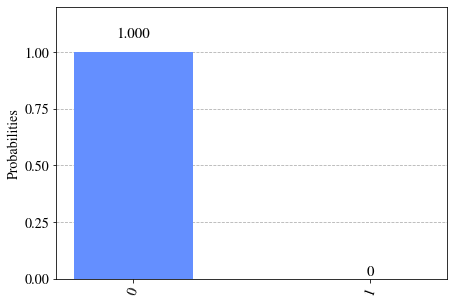

In [35]:
counts = {format(n, "0"+str(N_qub)+"b"): 0 for n in range(2**N_qub)}
counts.update(result.get_counts(circuit))
print(counts)
plot_histogram(counts)

In [36]:
print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

This workspace's targets:
- ionq.qpu
- ionq.simulator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim


In [37]:
N_qub

1

In [38]:
#27 si

# Real device execution

In [39]:
qpu_backend = provider.get_backend("ionq.qpu")

In [40]:
cost = qpu_backend.estimate_cost(circuit, shots=16384)

print(f"Estimated cost: {cost.estimated_total}")

Estimated cost: 1.0


In [41]:
def cost_circ(Shot_n):
    cost=qpu_backend.estimate_cost(circuit, shots=Shot_n)

    price=cost.estimated_total

    return price

In [42]:
cost_circ(10000)

1.0

In [43]:
import numpy as np

shots=[]
costs=[]

for j in range(501):
    shots.append(20*j)
    costs.append(cost_circ(20*j))

Text(0, 0.5, 'Cost (USD)')

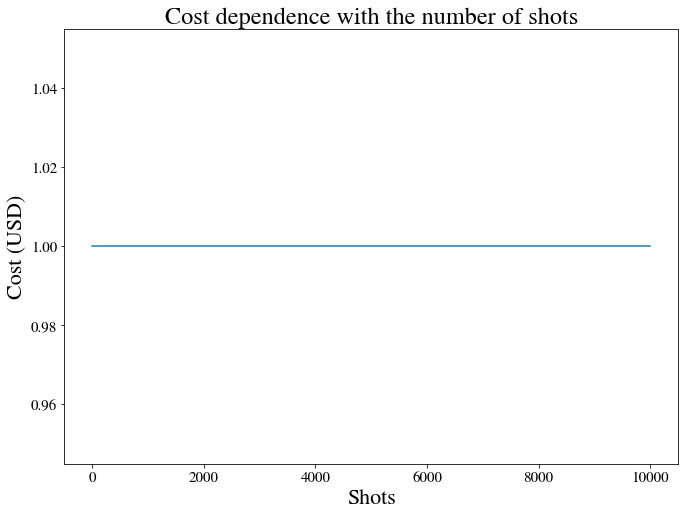

In [44]:
import matplotlib.pyplot as plt

plt.plot(shots,costs)

fontsize=22

plt.title("Cost dependence with the number of shots",fontsize=fontsize*1.1)
plt.xlabel("Shots",fontsize=fontsize)
plt.ylabel("Cost (USD)",fontsize=fontsize)


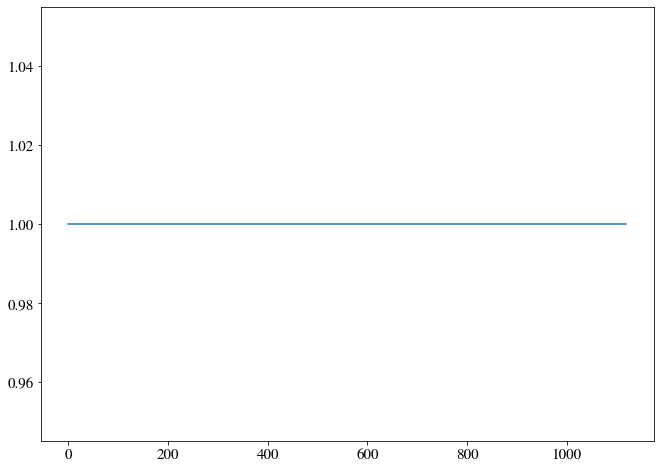

In [45]:
plt.plot(shots[0:57],costs[0:57])

In [46]:
circuit.draw()

┌───┐┌───┐┌───┐┌─┐
  q: ┤ H ├┤ I ├┤ H ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0

In [47]:
# Submit the circuit to run on Azure Quantum
job = qpu_backend.run(circuit, shots=16384,optimization_level=0,meas_level=0)
job_id = job.id()
print("Job id", job_id)

# Monitor job progress and wait until complete:
job_monitor(job)

optimization_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


Job id d214ca2e-d5ed-11ec-a073-00155dcf0c8a
Job Status: job has successfully run


Result(backend_name='ionq.qpu', backend_version='1', qobj_id='QEM', job_id='d214ca2e-d5ed-11ec-a073-00155dcf0c8a', success=True, results=[ExperimentResult(shots=16384, success=True, meas_level=2, data=ExperimentResultData(counts={'0': 6000.0}, probabilities=defaultdict(<class 'int'>, {'0': 0.3662109375})), header=QobjExperimentHeader(meas_map='[0]', metadata=None, name='QEM', num_qubits='1', qiskit='True'))])
{'0': 6000.0, '1': 0}


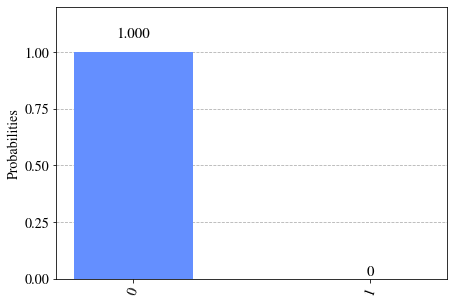

In [48]:
result = job.result()
print(result)
counts = {format(n, "0"+str(N_qub)+"b"): 0 for n in range(2**N_qub)}
counts.update(result.get_counts(circuit))
print(counts)
plot_histogram(counts)

In [49]:
ResultJ=qpu_backend.retrieve_job('9a475c60-d57a-11ec-9220-00155dfda0a4')

In [50]:
print(ResultJ.result())

Result(backend_name='ionq.qpu', backend_version='1', qobj_id='QEM', job_id='9a475c60-d57a-11ec-9220-00155dfda0a4', success=True, results=[ExperimentResult(shots=16384, success=True, meas_level=2, data=ExperimentResultData(counts={'0': 7000.0}, probabilities=defaultdict(<class 'int'>, {'0': 0.42724609375})), header=QobjExperimentHeader(meas_map='[0]', metadata=None, name='QEM', num_qubits='1', qiskit='True'))])


Result(backend_name='ionq.qpu', backend_version='1', qobj_id='QEM', job_id='9a475c60-d57a-11ec-9220-00155dfda0a4', success=True, results=[ExperimentResult(shots=16384, success=True, meas_level=2, data=ExperimentResultData(counts={'0': 7000.0}, probabilities=defaultdict(<class 'int'>, {'0': 0.42724609375})), header=QobjExperimentHeader(meas_map='[0]', metadata=None, name='QEM', num_qubits='1', qiskit='True'))])
{'0': 7000.0, '1': 0}


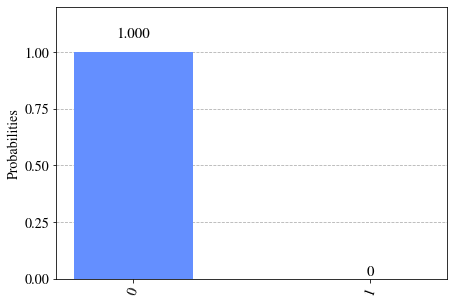

In [51]:
result =ResultJ.result()
print(result)
counts = {format(n, "01b"): 0 for n in range(2**N_qub)}
counts.update(result.get_counts(circuit))
print(counts)
plot_histogram(counts)

In [79]:
ResultJ=qpu_backend.retrieve_job('9a475c60-d57a-11ec-9220-00155dfda0a4')
ResultJ.result().results[0].data.counts

{'0': 7000.0}